In [6]:
import pandas as pd
import json
import os
import time
import matplotlib.pyplot as plt

In [7]:
# data holds a dict of a sample run to use for testing purposes

testf = open('sample.run')

data = json.load(testf)

data

{'gold_per_floor': [119,
  139,
  158,
  172,
  185,
  185,
  213,
  229,
  229,
  246,
  246,
  277,
  277,
  75,
  75,
  146,
  146,
  163,
  193,
  212,
  262,
  280,
  309,
  309,
  322,
  370,
  370,
  370,
  370,
  384,
  384,
  384,
  461,
  461,
  479,
  494,
  199,
  199,
  246,
  258,
  282,
  294,
  378,
  390,
  31,
  58,
  58,
  78,
  78,
  78],
 'floor_reached': 51,
 'playtime': 9059,
 'items_purged': ['Defend_P', 'Strike_P', 'Strike_P'],
 'score': 1205,
 'play_id': 'b173af22-458b-497e-8a20-f02a0b7ae345',
 'local_time': '20230315144117',
 'is_ascension_mode': True,
 'campfire_choices': [{'data': 'Eruption', 'floor': 6.0, 'key': 'SMITH'},
  {'floor': 15.0, 'key': 'REST'},
  {'floor': 24.0, 'key': 'REST'},
  {'floor': 27.0, 'key': 'REST'},
  {'data': 'Adaptation', 'floor': 29.0, 'key': 'SMITH'},
  {'floor': 32.0, 'key': 'REST'},
  {'floor': 42, 'key': 'REST'},
  {'floor': 44, 'key': 'REST'},
  {'floor': 49, 'key': 'REST'}],
 'neow_cost': 'TEN_PERCENT_HP_LOSS',
 'seed_source

In [8]:
# sets up character names array and array of dictionaries that will hold runs for each character

chars = ['IRONCLAD', 'THE_SILENT', 'DEFECT', 'WATCHER']
dicts = []

In [9]:
# fill out dicts array with total current runs for each character

# saves path to slay the spire runs folder
dirpath = r'C:\Program Files (x86)\Steam\steamapps\common\SlayTheSpire\runs'
testpath = '../../data'

# for each character, creates array and appends a dict containing info for each run file in character's run folder
for name in chars:
    runs = []
    for path in os.listdir(testpath + "\\" + name):
        f = open(testpath + "\\" + name + "\\" + path)
        runs.append(json.load(f))
        last = runs[-1]
        if ('PrismaticShard' in last["relics"]):
            print(last)
            runs.pop()
        f.close()
    dicts.append(runs)

{'gold_per_floor': [112, 125, 141, 141, 17, 17, 51, 51, 51, 62, 62, 137, 206, 263, 263, 364, 364, 399, 22, 85, 145, 145, 145, 59, 116, 116, 152, 180, 205, 216, 231, 231, 359, 359, 400, 400, 29, 42, 80, 80, 106, 184, 265, 265, 328, 328, 340, 350, 350, 350], 'floor_reached': 51, 'playtime': 5597, 'items_purged': ['Regret', 'Strike_R', 'Bite+1', 'Quick Slash'], 'score': 840, 'play_id': '20e86f9f-b17f-4bd4-adec-9245c59a7376', 'local_time': '20230819233346', 'is_ascension_mode': True, 'campfire_choices': [{'data': 'Bash', 'floor': 6.0, 'key': 'SMITH'}, {'data': 'SashWhip', 'floor': 15.0, 'key': 'SMITH'}, {'data': 'Feel No Pain', 'floor': 23.0, 'key': 'SMITH'}, {'floor': 32.0, 'key': 'REST'}, {'data': 'Armaments', 'floor': 40.0, 'key': 'SMITH'}, {'data': 'Dark Embrace', 'floor': 44.0, 'key': 'SMITH'}, {'data': 'Setup', 'floor': 46.0, 'key': 'SMITH'}, {'data': 'Reprogram', 'floor': 49.0, 'key': 'SMITH'}], 'neow_cost': 'NONE', 'seed_source_timestamp': 0, 'circlet_count': 0, 'master_deck': ['De

In [10]:
# getWinRates() gets and returns the win rates for each character
def getWinRates():
    char_wrs = []
    for x, c in enumerate(dicts):
        char_wrs.append([0, 0])
        for r in c:
            char_wrs[x][1] += 1
            if (r["victory"]):
                char_wrs[x][0] += 1
        char_wrs[x].append(round(char_wrs[x][0] / char_wrs[x][1], 2))

    return char_wrs

In [11]:
# getScores() gets and returns high + avg scores for each char.
def getScores():
    scrs = []
    for x, c in enumerate(dicts):
        scrs.append([0])
        scores = 0
        cnt = 0
        for r in c:
            scores += r["score"]
            cnt += 1
            if (r["score"] > scrs[x][0]):
                scrs[x][0] = r["score"]
        scrs[x].append(int(scores / cnt))
    return scrs

In [12]:
# getAvgFlrs() calculates and returns avg floor for each char., including and not including wins (reaching lvl 51)
def getAvgFlrs():
    avgFlrs = []
    for x, c in enumerate(dicts):
        flrs = 0
        cnt = 0
        flrs_nw = 0
        cnt_nw = 0
        for r in c:
            flrs += r["floor_reached"]
            cnt += 1
            if (not r["victory"]):
                flrs_nw += r["floor_reached"]
                cnt_nw += 1
        avgFlrs.append([int(flrs/cnt), int(flrs_nw/cnt_nw)])
    return avgFlrs

In [13]:
char_info_cols = ['Wins', 'Games', 'Win_Rate', 'High_Score', 'Avg_Score', 'Avg_Flr', 'Avg_Flr_No_Wins']
info_dict = {chars[0]: [], chars[1]: [], chars[2]: [], chars[3]: []}

wrs = getWinRates()
scrs = getScores()
avgFlrs = getAvgFlrs()
for i, c in enumerate(chars):
    info_dict[c] = info_dict[c] + wrs[i] + scrs[i] + avgFlrs[i]

char_df = pd.DataFrame.from_dict(info_dict, orient='index', columns=char_info_cols)

char_df

,Wins,Games,Win_Rate,High_Score,Avg_Score,Avg_Flr,Avg_Flr_No_Wins
IRONCLAD,11,29,0.38,1526,763,36,27
THE_SILENT,15,50,0.30,1840,710,32,24
DEFECT,12,41,0.29,2140,756,33,25
WATCHER,17,32,0.53,2179,1013,42,32


In [14]:
""" char_df_html = char_df.drop(['High_Score', 'Avg_Score', 'Avg_Flr', 'Avg_Flr_No_Wins'], axis=1).rename(columns={"Win_Rate":"Win Rate"}, index={"THE_SILENT":"SILENT"})
f = open("../../scripts/overall_df.txt", "w")
f.write(char_df_html.to_html(table_id="info-table", border=0))
f.close() """

' char_df_html = char_df.drop([\'High_Score\', \'Avg_Score\', \'Avg_Flr\', \'Avg_Flr_No_Wins\'], axis=1).rename(columns={"Win_Rate":"Win Rate"}, index={"THE_SILENT":"SILENT"})\nf = open("../../scripts/overall_df.txt", "w")\nf.write(char_df_html.to_html(table_id="info-table", border=0))\nf.close() '

In [15]:
wr_info = []

for x in range(0,4):
    wr_arr = []
    wr_arr.append(char_df['Win_Rate'][x])
    wr_arr.append(char_df['Wins'][x])
    wr_arr.append(char_df['Games'][x])
    wr_info.append(wr_arr)

C:\Users\happy\AppData\Local\Temp\ipykernel_25616\3422709739.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wr_arr.append(char_df['Win_Rate'][x])
C:\Users\happy\AppData\Local\Temp\ipykernel_25616\3422709739.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wr_arr.append(char_df['Wins'][x])
C:\Users\happy\AppData\Local\Temp\ipykernel_25616\3422709739.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wr_arr.append(char_df['Ga

In [16]:
filepath = "../../scripts/overall_wr_info.txt"
if os.path.exists(filepath):
    f.close()
    os.remove(filepath)
f = open(filepath, "w")
f.write(str(wr_info))
f.close()

In [17]:
# gets and stores dict of neow bonuses keying to dicts of costs and wins/games (neows) 
# and dict (bonus_info) of neow bonuses keying to overall wins/games

neows = {}
bonus_info = {}
for c in dicts:
    for r in c:
        bonus = r['neow_bonus']
        cost = r['neow_cost']
        neows.setdefault(bonus, {})
        bonus_info.setdefault(bonus, [0, 0])
        neows[bonus].setdefault(cost, [0, 0])
        neows[bonus][cost][1] += 1
        bonus_info[bonus][1] += 1
        if(r['victory']):
            neows[bonus][cost][0] += 1
            bonus_info[bonus][0] += 1

In [18]:
# puts neow's bonuses' wins/times chosen/win rates into (nw_df) and displays it

print("Neow's Bonus Win Rates")

# put into dataframe
neow_columns = ["Wins", "Times_Chosen"]
nw_df = pd.DataFrame.from_dict(bonus_info, orient='index', columns=neow_columns)
nw_df.columns.name = "Neow's_Bonus"
nw_df['Win_Rate'] = round(nw_df['Wins'] / nw_df['Times_Chosen'], 2)
nw_df = nw_df.sort_values(by=['Win_Rate', 'Times_Chosen'], ascending=False)
nw_df

Neow's Bonus Win Rates


Neow's_Bonus,Wins,Times_Chosen,Win_Rate
HUNDRED_GOLD,4,6,0.67
ONE_RANDOM_RARE_CARD,2,3,0.67
TEN_PERCENT_HP_BONUS,3,5,0.60
BOSS_RELIC,4,7,0.57
RANDOM_COLORLESS_2,5,10,0.50
REMOVE_TWO,9,20,0.45
THREE_RARE_CARDS,4,9,0.44
REMOVE_CARD,3,7,0.43
THREE_ENEMY_KILL,10,25,0.40
TWO_FIFTY_GOLD,3,9,0.33


In [19]:
nw_df_html = nw_df.rename(columns={"Times_Chosen":"Times Chosen", "Win_Rate":"Win Rate"})
f = open("../../scripts/neow_body.txt", "w")
f.write(nw_df_html.to_html(table_id="nw-body", border=0, header=False))
f.close()

In [20]:
# function that takes reference to a neow bonus dictionary (has costs + wins/times_chosen) and returns a df of cost info for that bonus

def create_bonus_df(bonus):

    df = pd.DataFrame.from_dict(bonus, orient='index', columns=neow_columns)
    df['Win_Rate'] = round(df['Wins'] / df['Times_Chosen'], 2)
    df.insert(0, "Neow's Cost", df.index.values)
    df = df.sort_values(by=['Times_Chosen'], ascending=False)
    df = df.sort_values(by=['Win_Rate'], ascending=False)
    df = df.reset_index(drop=True)
    df = df.rename(columns={"Times_Chosen":"Times Chosen", "Win_Rate":"Win Rate"})
    return df

In [21]:
neows_html = {}
f = open("../../scripts/neow-bycost-tables.txt", "w")

for bonus in neows:
    if ("NONE" in neows[bonus]):
        continue

    cost_df = create_bonus_df(neows[bonus])
    cost_df = cost_df.set_index(["Neow's Cost"])
    cost_df.index.name = None
    tableID = bonus.replace("_", "-").lower() + "-T"
    neows_html[tableID] = cost_df.to_html(table_id=tableID, border=0)

f.write(json.dumps(neows_html))
    
f.close()

In [22]:
# funcation that takes df for a neow bonus and name of bonus and prints a table with cost info for that bonus

def plot_bonus_table(bonus_name):
    df = create_bonus_df(neows[bonus_name])
    fig = plt.figure(figsize = (8, .2))
    tbl = fig.add_subplot(111)

    tbl.table(cellText = df.values, rowLabels = df.index,
            colLabels = df.columns, cellLoc='center')
    tbl.set_title(bonus_name)
    tbl.axis('off')

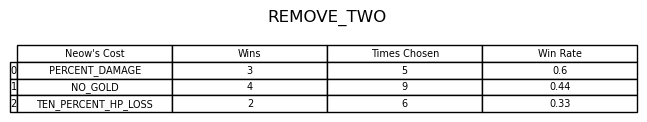

In [23]:
# for seeing win rate table of certain bonus + it's costs
bonus_name = 'REMOVE_TWO'
plot_bonus_table(bonus_name)

In [24]:
# caculate and store wins + games for each relic in (relics) dict
acts = [17, 34, 51]
relics = {}                                 # relics = {act1 = {r1 = [x,y], ...}, ...}

for c in dicts:
    for r in c:
        win = r['victory']
        for relic in r['relics']:
            relics.setdefault(relic, [0,0])
            relics[relic][1] += 1
            if (win):
                relics[relic][0] += 1

In [25]:
# creates dataframe with # wins, # games, and winrates of all relics in (r_df) and prints it
print("ALL RELIC WIN RATES")

relic_columns = ['Wins', 'Games']
r_df = pd.DataFrame.from_dict(relics, orient='index', columns=relic_columns)
r_df.columns.name = 'Relic'
r_df['Win_Rate'] = round(r_df['Wins'] / r_df['Games'], 2)
r_df = r_df.sort_values(by=['Win_Rate', 'Games'], ascending=False)

for r in r_df.index:
    print(r)

ALL RELIC WIN RATES
Lizard Tail
FossilizedHelix
Nuclear Battery
Sling
Runic Cube
Enchiridion
Paper Crane
Damaru
Self Forming Clay
TeardropLocket
Mark of Pain
Necronomicon
Cauldron
Emotion Chip
CultistMask
CloakClasp
Runic Dome
Melange
Toxic Egg 2
Ninja Scroll
Runic Pyramid
Busted Crown
WingedGreaves
Nilry's Codex
Singing Bowl
Regal Pillow
Ice Cream
CaptainsWheel
Molten Egg 2
SlaversCollar
Whetstone
Happy Flower
Red Mask
Anchor
Pantograph
Torii
Meat on the Bone
Peace Pipe
Bottled Flame
Potion Belt
InkBottle
Akabeko
Blue Candle
Pen Nib
Calling Bell
SacredBark
Snake Skull
VioletLotus
Spirit Poop
Lee's Waffle
GoldenEye
Letter Opener
Calipers
Kunai
Bag of Marbles
Vajra
HornCleat
Fusion Hammer
Dream Catcher
Bronze Scales
Old Coin
Medical Kit
Girya
Bag of Preparation
Art of War
Ornamental Fan
Centennial Puzzle
Prayer Wheel
Thread and Needle
Paper Frog
Frozen Eye
Coffee Dripper
Yang
PreservedInsect
Frozen Egg 2
Nunchaku
Mercury Hourglass
Ginger
Pocketwatch
Mummified Hand
ClockworkSouvenir
Dead

In [26]:
bossR = ["Astrolabe", "Black Blood", "Black Star", "Busted Crown", "Calling Bell", "Coffee Dripper", "Cursed Key", "Ectoplasm", "Empty Cage", "Frozen Core", "Fusion Hammer", "Holy Water", "Hovering Kite", "Inserter", "Mark of Pain", "Nuclear Battery", "Pandora's Box", "Philosopher's Stone", "Ring of the Serpent", "Runic Cube", "Runic Dome", "Runic Pyramid", "Sacred Bark", "Slaver's Collar", "Snecko Eye", "Sozu", "Tiny House", "Velvet Choker", "Violet Lotus", "Wrist Blade"]

In [27]:
boss_r_df = pd.DataFrame(columns=relic_columns)
for r in r_df.index:
    if r in bossR:
        boss_r_df = pd.concat([boss_r_df, r_df.loc[r_df.index == r]])

boss_r_df

,Wins,Games,Win_Rate
Nuclear Battery,4,4,1.00
Runic Cube,3,3,1.00
Mark of Pain,1,1,1.00
Runic Dome,1,1,1.00
Runic Pyramid,13,16,0.81
Busted Crown,8,10,0.80
Calling Bell,6,9,0.67
Fusion Hammer,8,13,0.62
Coffee Dripper,3,5,0.60
Snecko Eye,4,7,0.57


In [28]:
# creates (sm_r_df) with 3 most gotten relics of each win rate value and prints it
sm_r_df = pd.DataFrame()
wRates = r_df['Win_Rate'].unique()

for wr in wRates:
    sm_r_df = pd.concat([sm_r_df, r_df.loc[r_df['Win_Rate'] == wr].head(3)])

sm_r_df

Relic,Wins,Games,Win_Rate
Lizard Tail,8,8,1.00
FossilizedHelix,4,4,1.00
Nuclear Battery,4,4,1.00
Toxic Egg 2,5,6,0.83
Ninja Scroll,5,6,0.83
...,...,...,...
Odd Mushroom,2,8,0.25
Velvet Choker,1,4,0.25
Tough Bandages,0,3,0.00
Nloth's Gift,0,3,0.00


In [29]:
def name_to_num(month):
    match month:
        case "Jan":
            return "01"
        case "Feb":
            return "02"
        case "Mar":
            return "03"
        case "Apr":
            return "04"
        case "May":
            return "05"
        case "Jun":
            return "06"
        case "Jul":
            return "07"
        case "Aug":
            return "08"
        case "Sep":
            return "09"
        case "Oct":
            return "10"
        case "Nov":
            return "11"
        case "Dec":
            return "12"

In [30]:
runs_abrv = {"Date": [], "Character": [], "Ascension_Level": [], "Floor_Reached": [], "Heart": [], "Win": []}

for x,c in enumerate(dicts):
    for r in c:
        timestamp = time.ctime(r["timestamp"]).split()
        if (len(timestamp[2]) == 1):
            timestamp[2] = "0" + timestamp[2]
        runs_abrv["Date"].append(name_to_num(timestamp[1]) + "/" + timestamp[2] + "/" + timestamp[4][2:])

        runs_abrv["Character"].append(chars[x].replace("THE_", ""))

        if (r["is_ascension_mode"]):
            runs_abrv["Ascension_Level"].append("Asc " + str(r["ascension_level"]))
        else:
            runs_abrv["Ascension_Level"].append("No Asc")

        flr_rched = r["floor_reached"]
        runs_abrv["Floor_Reached"].append(flr_rched)
        heart = "No"
        if (flr_rched > 53):
            heart = "Yes"
        runs_abrv["Heart"].append(heart)
        
        if (r["victory"]):
            runs_abrv["Win"].append("Y")
        else:
            runs_abrv["Win"].append("N")

In [31]:
runs_df = pd.DataFrame.from_dict(runs_abrv)

dateSort = []
for d in runs_df['Date']:
    dateList = d.split('/')
    dateList[0], dateList[1] = dateList[1], dateList[0]
    dateSort.append(''.join(dateList[::-1]))

runs_df['Sort'] = dateSort

runs_df.index.name = None
runs_df = runs_df.sort_values('Sort', ascending=False)
runs_df = runs_df.drop(axis=1, columns=['Sort'])
runs_df = runs_df.set_index('Date')
runs_df.index.name = None
runs_df

,Character,Ascension_Level,Floor_Reached,Heart,Win
03/25/24,DEFECT,Asc 1,56,Yes,Y
03/25/24,SILENT,Asc 1,56,Yes,Y
03/19/24,IRONCLAD,Asc 19,16,No,N
03/18/24,IRONCLAD,Asc 19,27,No,N
03/18/24,DEFECT,Asc 20,52,No,Y
...,...,...,...,...,...
02/14/23,WATCHER,Asc 6,51,No,Y
02/13/23,WATCHER,Asc 6,40,No,N
02/13/23,WATCHER,Asc 6,33,No,N
02/12/23,SILENT,Asc 7,51,No,Y


In [32]:
runs_df_html = runs_df.rename(columns={"Character":"Character", "Ascension_Level":"Asc", "Floor_Reached":"Floor", "Win":"More"})
runs_header = pd.DataFrame([list(runs_df_html.columns)]).to_html(table_id="runs-head", border=0, header=None)
f = open("../../scripts/all_runs.txt", "w")
f.write(runs_header + "," + runs_df_html.to_html(table_id="runs", border=0, header=None))
f.close()

In [33]:
# runs_header = pd.DataFrame([list(runs_df_html.columns)]).set_index('0')
# runs_header